# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hoerunnisa
- **Email:** ichaicha075@gmail.com
- **ID Dicoding:** Hoerunnisa

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda per bulan selama periode 2011–2012?
- Bagaimana pengaruh musim, kondisi cuaca, dan jenis hari terhadap rata-rata jumlah penyewaan sepeda harian selama periode 2011–2012??

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Library pandas dan numpy digunakan untuk manipulasi data, sedangkan matplotlib dan seaborn digunakan untuk membuat visualisasi data yang mendukung analisis eksploratif.

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset berhasil dimuat dan berisi data penyewaan sepeda harian yang mencakup informasi waktu, kondisi cuaca, serta jumlah penyewaan.
- Setiap baris data merepresentasikan satu hari pengamatan.
- Variabel cnt menunjukkan total penyewaan sepeda per hari, yang merupakan gabungan dari pengguna kasual `(casual)` dan terdaftar `(registered)`.
- Dataset menyediakan beberapa faktor pendukung seperti musim, hari kerja/libur, dan kondisi cuaca yang berpotensi memengaruhi jumlah penyewaan sepeda.
- Beberapa variabel seperti musim, hari, dan kondisi cuaca masih direpresentasikan dalam bentuk kode numerik.

### Assessing Data

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
day_df.duplicated().sum()

np.int64(0)

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset terdiri dari 731 baris dan 16 kolom, yang merepresentasikan data penyewaan sepeda harian selama dua tahun.
- Seluruh kolom memiliki jumlah data lengkap (non-null), sehingga tidak ditemukan missing value pada dataset.
- Tidak terdapat data duplikat, menunjukkan kualitas data yang baik.
-  Struktur data secara umum berada dalam kondisi baik dan konsisten, dengan kombinasi tipe data numerik dan numerik desimal.
- Kolom dteday masih bertipe object dan sebaiknya dikonversi ke tipe datetime untuk memudahkan analisis berbasis waktu.
- Beberapa variabel kategorikal seperti musim, hari, dan kondisi cuaca masih direpresentasikan dalam bentuk kode numerik, sehingga memerlukan interpretasi lanjutan sebelum analisis eksploratif dilakukan.

### Cleaning Data

In [7]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow/Fog'}
year_map = {0: '2011', 1: '2012'}
workingday_map = {0: 'Holiday', 1: 'Working Day'}
weekday_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
    3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

day_df['season'] = day_df['season'].map(season_map)
day_df['weathersit'] = day_df['weathersit'].map(weather_map)
day_df['yr'] = day_df['yr'].map(year_map)
day_df['workingday'] = day_df['workingday'].map(workingday_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)

day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [15]:
day_df['year_month'] = day_df['dteday'].dt.to_period('M')
monthly_df = day_df.groupby('year_month')['cnt'].sum().reset_index()
monthly_df['year_month'] = monthly_df['year_month'].astype(str)
monthly_df.head()

,year_month,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


**Insight:**
- Beberapa variabel kategorikal, yaitu season, weathersit, yr, workingday, dan weekday, telah dikonversi dari representasi numerik menjadi label kategorikal yang lebih deskriptif. Langkah ini bertujuan untuk meningkatkan keterbacaan data serta mempermudah interpretasi hasil analisis dan visualisasi.
- Konversi tersebut memungkinkan analisis yang lebih intuitif terhadap pengaruh musim, kondisi cuaca, dan jenis hari terhadap jumlah penyewaan sepeda, tanpa perlu melakukan interpretasi kode numerik secara manual.
- Selain itu, kolom dteday diubah ke tipe data datetime untuk mendukung analisis berbasis waktu, seperti pengamatan tren penyewaan sepeda secara bulanan dan tahunan.
- Pembentukan variabel turunan year_month dari kolom tanggal memungkinkan agregasi data pada tingkat bulanan, yang menjadi dasar dalam analisis tren penggunaan layanan bike sharing dari waktu ke waktu.

## Exploratory Data Analysis (EDA)

### Distribusi dan Ringkasan Data

In [8]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731.000000,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,NaN,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,NaN,NaN,Saturday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,NaN,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,0.028728,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,0.000000,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,0.000000,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,0.000000,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,1.000000,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Jumlah penyewaan sepeda per hari (cnt) menunjukkan variasi yang cukup besar, dengan perbedaan signifikan antara nilai minimum dan maksimum, yang mengindikasikan adanya fluktuasi penggunaan sepeda dari hari ke hari.
- Rata-rata jumlah penyewaan harian berada pada kisaran ratusan hingga ribuan, menunjukkan tingkat penggunaan sepeda yang relatif tinggi.
- Jika dilihat dari jenis pengguna, jumlah penyewaan oleh pengguna terdaftar (registered) secara konsisten lebih tinggi dibandingkan pengguna kasual (casual), sehingga pengguna terdaftar menjadi kontributor utama terhadap total penyewaan.
- Variabel lingkungan seperti suhu (temp, atemp), kelembaban (hum), dan kecepatan angin (windspeed) memiliki nilai yang bervariasi, sehingga berpotensi memengaruhi pola penyewaan sepeda.
- Dataset memiliki kombinasi variabel numerik dan kategorikal, yang memungkinkan dilakukan analisis lanjutan untuk melihat hubungan antara kondisi cuaca, waktu, dan jumlah penyewaan sepeda.

### Jumlah Penyewaan Sepeda per Tahun

In [9]:
day_df.groupby('yr')['cnt'].sum()

,cnt
yr,
2011,1243103
2012,2049576


- Total penyewaan sepeda pada tahun 2012 lebih tinggi dibandingkan tahun 2011.
- Perbedaan total penyewaan ini menunjukkan adanya tren peningkatan penggunaan layanan bike sharing dari tahun ke tahun.
- Peningkatan tersebut mengindikasikan bahwa layanan bike sharing semakin diminati atau digunakan secara lebih intensif pada periode selanjutnya.

### Jumlah Penyewaan Sepeda Berdasarkan Musim

In [10]:
day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)

,cnt
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


- Total penyewaan sepeda tertinggi terjadi pada musim Summer dan Fall, menunjukkan bahwa aktivitas penyewaan cenderung meningkat pada periode tersebut.
- Musim Winter memiliki total penyewaan yang lebih rendah dibandingkan musim lainnya, yang mengindikasikan adanya penurunan penggunaan sepeda pada musim dengan kondisi cuaca yang kurang mendukung.
- Perbedaan jumlah penyewaan antar musim menunjukkan bahwa faktor musiman berpotensi memengaruhi pola penggunaan layanan bike sharing.

### Rata-rata Penyewaan Sepeda: Hari Kerja vs Hari Libur

In [11]:
day_df.groupby('workingday')['cnt'].mean().sort_values(ascending=False)

,cnt
workingday,
Working Day,4584.820000
Holiday,4330.168831


- Rata-rata penyewaan sepeda pada hari kerja lebih tinggi dibandingkan hari libur.
- Perbedaan ini mengindikasikan bahwa penggunaan sepeda cenderung meningkat pada hari dengan aktivitas rutin, meskipun faktor penyebab spesifiknya belum dianalisis lebih lanjut.

### Pola Penyewaan Berdasarkan Hari dalam Seminggu

In [52]:
day_df.groupby('weekday')['cnt'].mean().sort_values(ascending=False)

,cnt
weathersit,
Clear,4876.786177
Mist,4035.862348
Light Snow/Rain,1803.285714


- Rata-rata penyewaan sepeda tertinggi terjadi pada hari kerja menjelang akhir minggu, khususnya Thursday dan Friday.
- Hari Minggu menunjukkan rata-rata penyewaan terendah dibandingkan hari lainnya.
- Pola ini menunjukkan adanya variasi penyewaan berdasarkan hari dalam seminggu, dengan kecenderungan peningkatan pada hari kerja tertentu, meskipun penyewaan pada akhir pekan tidak selalu lebih rendah.
- Perbedaan ini mengindikasikan adanya pola aktivitas harian yang memengaruhi penggunaan sepeda.

### Jumlah Penyewaan Sepeda Berdasarkan Cuaca

In [53]:
day_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)

,cnt
weathersit,
Clear,2257952
Mist,996858
Light Snow/Rain,37869


- Total penyewaan sepeda tertinggi terjadi pada kondisi cuaca Clear (cerah), yang menunjukkan bahwa aktivitas penyewaan sepeda cenderung meningkat ketika kondisi cuaca mendukung dan nyaman untuk bersepeda.
- Kondisi cuaca Mist (berkabut) memiliki total penyewaan yang lebih rendah dibandingkan cuaca cerah, mengindikasikan bahwa penurunan kualitas cuaca mulai berdampak pada minat pengguna untuk menyewa sepeda.
- Sementara itu, kondisi Light Snow/Rain menunjukkan total penyewaan yang jauh lebih rendah dibandingkan kondisi cuaca lainnya, yang menandakan bahwa cuaca dengan hujan atau salju ringan secara signifikan menurunkan aktivitas penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda per bulan selama periode data?

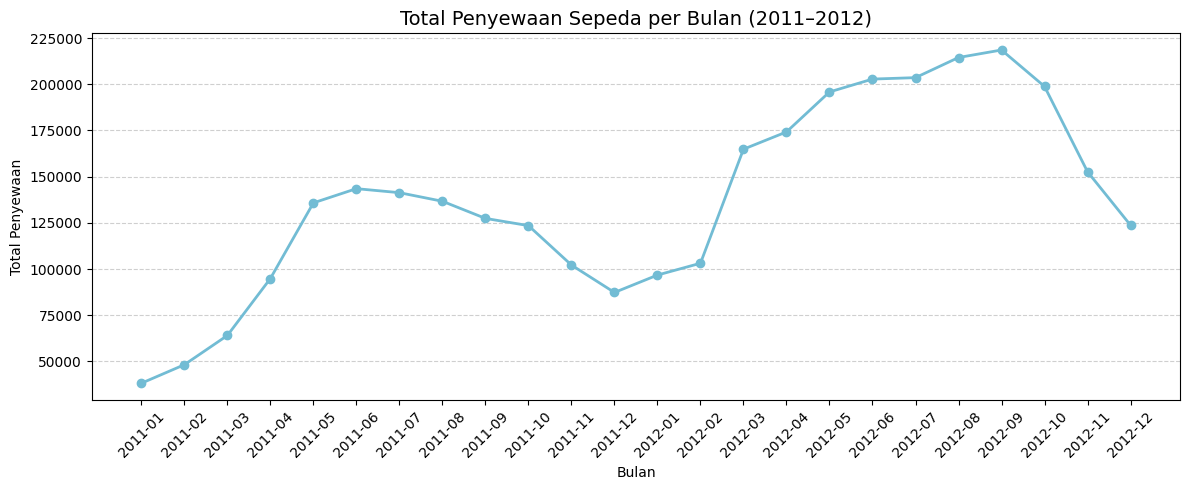

In [16]:
plt.figure(figsize=(12,5))
plt.plot(
    monthly_df['year_month'],
    monthly_df['cnt'],
    marker='o',
    linewidth=2,
    color='#72BCD4'
)

plt.title('Total Penyewaan Sepeda per Bulan (2011–2012)', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah penyewaan sepeda per bulan menunjukkan pola musiman yang jelas selama periode 2011–2012.
- Penyewaan cenderung meningkat pada pertengahan tahun dan menurun pada akhir tahun, dengan pola yang relatif konsisten pada kedua tahun pengamatan.
- Pola ini mengindikasikan bahwa faktor musiman, seperti kondisi cuaca dan waktu dalam setahun, berpotensi memengaruhi tingkat aktivitas penyewaan sepeda.

### Pertanyaan 2: Bagaimana pengaruh musim, kondisi cuaca, dan jenis hari terhadap rata-rata jumlah penyewaan sepeda harian selama periode 2011–2012?

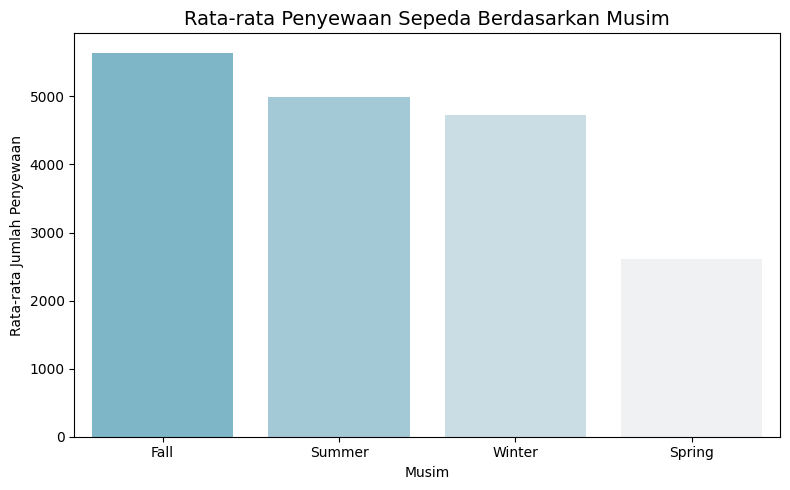

In [25]:
season_avg = (
    day_df.groupby('season')['cnt']
    .mean()
    .reset_index()
    .sort_values(by='cnt', ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=season_avg,
    x='season',
    y='cnt',
    hue='season',
    palette=sns.light_palette('#72BCD4', n_colors=4, reverse=True),
    legend=False
)

plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(False)
plt.tight_layout()
plt.show()

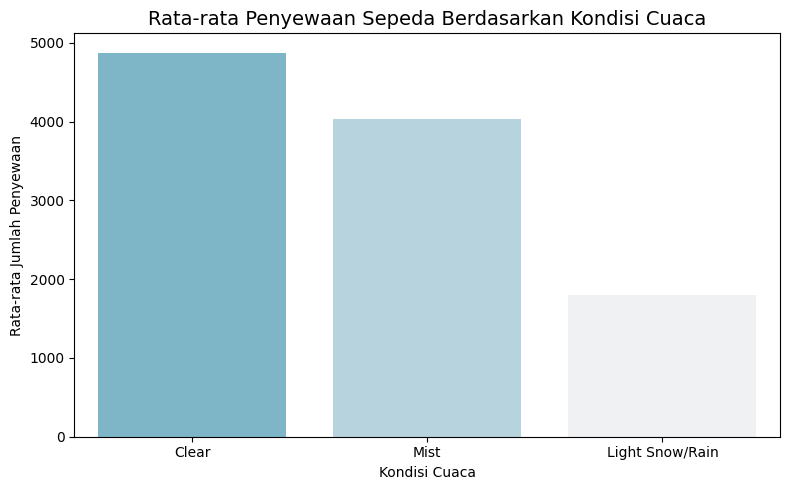

In [27]:
weather_avg = (
    day_df.groupby('weathersit')['cnt']
    .mean()
    .reset_index()
    .sort_values(by='cnt', ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=weather_avg,
    x='weathersit',
    y='cnt',
    hue='weathersit',
    palette=sns.light_palette('#72BCD4', n_colors=len(weather_avg), reverse=True),
    legend=False
)

plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(False)
plt.tight_layout()
plt.show()

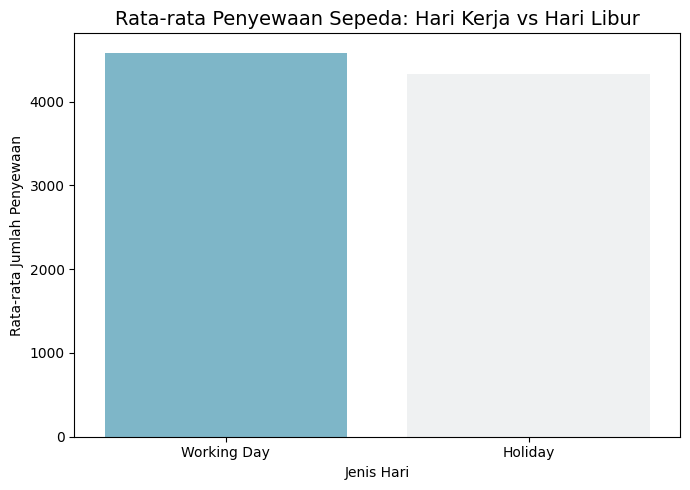

In [28]:
workingday_avg = (
    day_df.groupby('workingday')['cnt']
    .mean()
    .reset_index()
    .sort_values(by='cnt', ascending=False)
)

plt.figure(figsize=(7,5))
sns.barplot(
    data=workingday_avg,
    x='workingday',
    y='cnt',
    hue='workingday',
    palette=sns.light_palette('#72BCD4', n_colors=len(workingday_avg), reverse=True),
    legend=False
)

plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Hari Libur', fontsize=14)
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(False)
plt.tight_layout()
plt.show()

**Insight:**
- Rata-rata penyewaan sepeda tertinggi terjadi pada musim Fall dan Summer, sementara musim lainnya menunjukkan tingkat penyewaan yang relatif lebih rendah.
- Berdasarkan kondisi cuaca, cuaca cerah menghasilkan rata-rata penyewaan sepeda tertinggi, sedangkan kondisi cuaca yang kurang baik menunjukkan penurunan jumlah penyewaan.
- Jika ditinjau dari jenis hari, hari kerja memiliki rata-rata penyewaan sepeda yang lebih tinggi dibandingkan hari libur.

Secara keseluruhan, hasil visualisasi menunjukkan bahwa musim, kondisi cuaca, dan jenis hari berperan dalam membentuk pola penyewaan sepeda, di mana kondisi lingkungan dan aktivitas rutin harian berpotensi memengaruhi tingkat penggunaan layanan bike sharing.

## Analisis Lanjutan: Clustering Tingkat Permintaan Penyewaan Sepeda

Untuk mendapatkan pemahaman yang lebih mendalam mengenai pola penyewaan sepeda, dilakukan analisis lanjutan dengan mengelompokkan hari berdasarkan tingkat permintaan (demand). Pengelompokan ini dilakukan menggunakan teknik manual clustering (binning) tanpa menggunakan algoritma machine learning.

Jumlah penyewaan sepeda harian (cnt) dibagi ke dalam tiga kategori berdasarkan distribusi data, yaitu:

- **Low Demand**: hari dengan jumlah penyewaan relatif rendah  
- **Medium Demand**: hari dengan jumlah penyewaan sedang  
- **High Demand**: hari dengan jumlah penyewaan tinggi  

Pendekatan ini bertujuan untuk membantu perusahaan bike sharing dalam memahami pola permintaan harian guna mendukung pengambilan keputusan operasional.

In [29]:
day_df['demand_category'] = pd.qcut(
    day_df['cnt'],
    q=3,
    labels=['Low Demand', 'Medium Demand', 'High Demand']
)

day_df['demand_category'].value_counts()

,count
demand_category,
Low Demand,244
Medium Demand,244
High Demand,243


Hasil diatas menunjukkan bahwa jumlah hari pada masing-masing kategori permintaan relatif seimbang, karena pembagian dilakukan berdasarkan quantile. Hal ini memastikan bahwa setiap kategori demand merepresentasikan proporsi data yang setara.


In [32]:
demand_palette = {
    'Low Demand': '#D3D3D3',
    'Medium Demand': '#72BCD4',
    'High Demand': '#FFA07A'
}

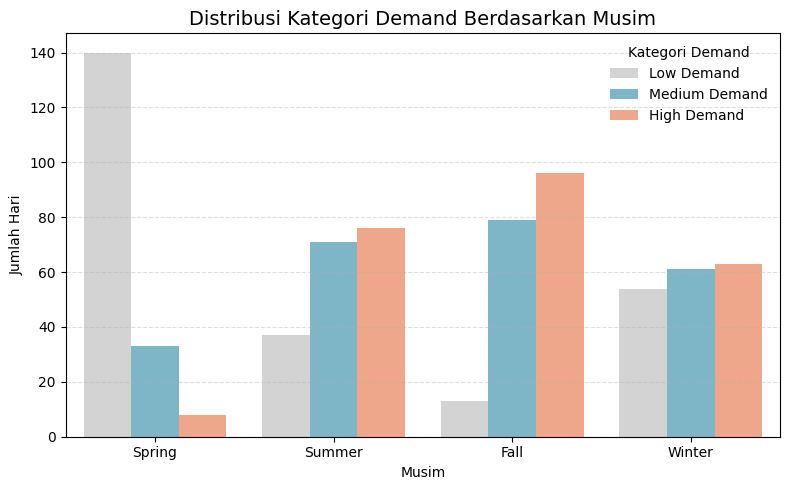

In [48]:
plt.figure(figsize=(8,5))

ax = sns.countplot(
    data=day_df,
    x='season',
    hue='demand_category',
    order=['Spring', 'Summer', 'Fall', 'Winter'],
    hue_order=['Low Demand', 'Medium Demand', 'High Demand'],
    palette=demand_palette
)

plt.title('Distribusi Kategori Demand Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')
ax.legend(
    title='Kategori Demand',
    loc='upper right',
    frameon=False
)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Hasil visualisasi menunjukkan bahwa kategori High Demand dan Medium Demand lebih banyak terjadi pada musim Summer dan Fall, sedangkan musim Spring didominasi oleh kategori Low Demand. Pada musim Winter, distribusi permintaan cenderung lebih seimbang di antara ketiga kategori.

Temuan ini mengindikasikan bahwa musim berpengaruh terhadap tingkat permintaan penyewaan sepeda, di mana permintaan cenderung meningkat pada musim dengan cuaca yang lebih hangat dan menurun pada musim peralihan seperti Spring.


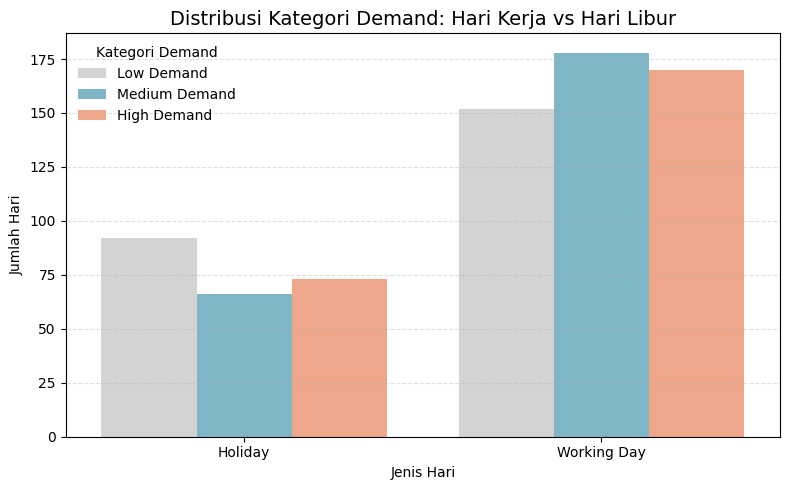

In [50]:
plt.figure(figsize=(8,5))

ax = sns.countplot(
    data=day_df,
    x='workingday',
    hue='demand_category',
    order=['Holiday', 'Working Day'],
    hue_order=['Low Demand', 'Medium Demand', 'High Demand'],
    palette=demand_palette
)

plt.title('Distribusi Kategori Demand: Hari Kerja vs Hari Libur', fontsize=14)
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Hari')
ax.legend(
    title='Kategori Demand',
    loc='upper left',
    frameon=False
)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

- Working Day: Jumlah hari dengan Medium Demand paling banyak, diikuti oleh High Demand, dan sedikit Low Demand.
- Holiday: Low Demand dominan, sedangkan High Demand lebih banyak daripada Low Demand.

Sepeda lebih banyak disewa dalam jumlah sedang atau tinggi pada hari kerja, mengindikasikan penggunaan untuk transportasi rutin.
Hari libur cenderung memiliki permintaan yang lebih rendah atau sedang, karena penggunaan lebih bersifat rekreasi.

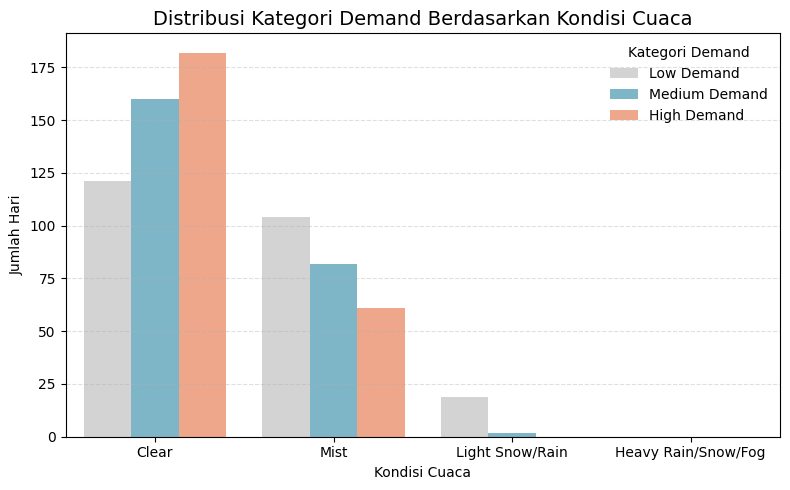

In [51]:
plt.figure(figsize=(8,5))

ax = sns.countplot(
    data=day_df,
    x='weathersit',
    hue='demand_category',
    order=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow/Fog'],
    hue_order=['Low Demand', 'Medium Demand', 'High Demand'],
    palette=demand_palette
)

plt.title('Distribusi Kategori Demand Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Hari')
ax.legend(
    title='Kategori Demand',
    loc='upper right',
    frameon=False
)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

- Cuaca Clear (Cerah) didominasi oleh Medium Demand dan High Demand. Hal ini menunjukkan bahwa kondisi cuaca cerah sangat mendukung aktivitas bersepeda, sehingga jumlah penyewaan cenderung tinggi.
- Pada kondisi Mist (Berkabut), jumlah hari dengan Low Demand meningkat, sementara High Demand menurun dibandingkan cuaca cerah. Ini mengindikasikan bahwa cuaca berkabut mulai mengurangi minat pengguna, meskipun aktivitas penyewaan masih cukup signifikan.
- Light Snow/Rain hampir seluruhnya berada pada kategori Low Demand, dengan sangat sedikit hari yang termasuk Medium Demand dan hampir tidak ada High Demand. Kondisi cuaca ini jelas berdampak negatif terhadap penggunaan sepeda.
- Heavy Rain/Snow/Fog tidak menunjukkan aktivitas penyewaan yang signifikan. Hal ini menandakan bahwa pada kondisi cuaca ekstrem, permintaan penyewaan sepeda hampir tidak terjadi.

Kondisi cuaca memiliki pengaruh yang kuat terhadap tingkat permintaan penyewaan sepeda. Cuaca cerah mendorong permintaan tinggi, sedangkan cuaca ekstrem secara signifikan menekan aktivitas penyewaan. Informasi ini dapat dimanfaatkan oleh perusahaan untuk mengoptimalkan ketersediaan sepeda dan strategi operasional berdasarkan prakiraan cuaca.

## Analisis Lanjutan: Pola Penggunaan Berdasarkan Jenis Pengguna

Selain menganalisis faktor waktu dan kondisi lingkungan, dilakukan analisis lanjutan untuk memahami pola penggunaan sepeda berdasarkan jenis pengguna, yaitu pengguna casual dan registered. Analisis ini bertujuan untuk melengkapi pemahaman terhadap karakteristik permintaan penyewaan sepeda.

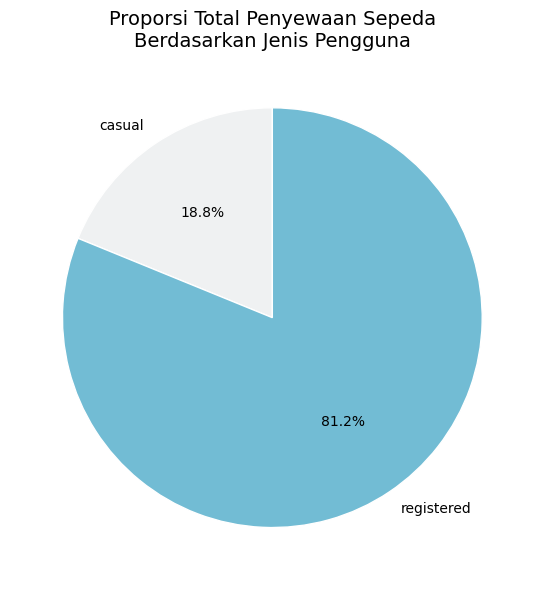

In [57]:
user_total = day_df[['casual', 'registered']].sum()

plt.figure(figsize=(6,6))
plt.pie(
    user_total,
    labels=user_total.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.light_palette('#72BCD4', n_colors=2, reverse=False),
    wedgeprops={'edgecolor': 'white'}
)

plt.title(
    'Proporsi Total Penyewaan Sepeda\nBerdasarkan Jenis Pengguna',
    fontsize=14
)

plt.tight_layout()
plt.show()


Visualisasi diatas menunjukkan bahwa sebagian besar penyewaan sepeda berasal dari pengguna registered, dengan proporsi sekitar 81%, sedangkan pengguna casual hanya menyumbang sekitar 19% dari total penyewaan. Hal ini mengindikasikan bahwa layanan bike sharing lebih banyak dimanfaatkan oleh pengguna terdaftar yang cenderung menggunakan sepeda secara rutin, dibandingkan pengguna kasual yang bersifat insidental atau rekreasional.

## Conclusion

Selama periode 2011–2012, jumlah penyewaan sepeda menunjukkan pola musiman yang jelas dan konsisten.

Pada tahun 2011, penyewaan meningkat tajam mulai Maret dan mencapai puncak pertama pada periode Mei–Juni, sebelum mengalami penurunan bertahap hingga mencapai nilai terendah pada Desember 2011.

Memasuki tahun 2012, jumlah penyewaan kembali meningkat secara signifikan sejak Februari, lalu mencapai puncak tertinggi sepanjang periode pengamatan pada bulan Agustus–September 2012. Setelah itu, penyewaan menurun cukup tajam pada Oktober–Desember 2012.

Jika dibandingkan antar tahun, total penyewaan sepeda pada tahun 2012 secara konsisten lebih tinggi dibandingkan tahun 2011 hampir di setiap bulan, yang mengindikasikan adanya pertumbuhan penggunaan layanan bike sharing dari tahun ke tahun, baik dari sisi jumlah pengguna maupun intensitas pemakaian.

Berdasarkan pola tren bulanan tersebut, perusahaan bike sharing disarankan untuk:

1. Menambah armada sepeda dan kapasitas layanan pada periode puncak permintaan, khususnya pada rentang Mei hingga September, dengan fokus utama pada Juli–September yang menunjukkan penyewaan tertinggi.
2. Menjadwalkan perawatan rutin, redistribusi sepeda, dan efisiensi operasional pada periode permintaan rendah, terutama pada Desember hingga Februari, ketika jumlah penyewaan berada pada titik terendah.
3. Menggunakan pola tren musiman ini sebagai dasar perencanaan bisnis tahunan, termasuk penentuan stok sepeda, strategi promosi musiman, serta pengalokasian sumber daya agar lebih optimal sesuai fluktuasi permintaan.

---

Hasil analisis menunjukkan bahwa musim, kondisi cuaca, dan jenis hari memiliki pengaruh yang signifikan terhadap rata-rata penyewaan sepeda harian.
1. Musim:
Rata-rata penyewaan tertinggi terjadi pada musim Fall dan Summer, sedangkan musim Spring memiliki rata-rata terendah. Hal ini menunjukkan bahwa suhu yang lebih hangat dan kondisi lingkungan yang nyaman mendorong aktivitas bersepeda.
2. Kondisi Cuaca:
Cuaca Clear (cerah) menghasilkan rata-rata penyewaan tertinggi. Sebaliknya, Light Snow/Rain  menunjukkan rata-rata penyewaan terendah, Heavy Rain/Snow/Fog bahkan hampir tidak ada aktivitas pada cuaca ekstrem.
3. Jenis Hari:
Hari kerja (Working Day) memiliki rata-rata penyewaan lebih tinggi dibandingkan hari libur. Ini mengindikasikan bahwa sepeda lebih banyak digunakan sebagai alat transportasi rutin daripada aktivitas rekreasi.

Analisis lanjutan menunjukkan bahwa kategori High Demand paling sering terjadi pada musim Summer dan Fall, pada hari kerja, dan saat cuaca cerah, sedangkan Low Demand dominan pada musim Spring, hari libur, dan kondisi cuaca buruk.

Saran/Rekomendasi:
Berdasarkan temuan tersebut, perusahaan disarankan untuk:
1. Mengoptimalkan distribusi sepeda pada musim Summer dan Fall, terutama pada hari kerja.
2. Mengurangi operasional atau melakukan penyesuaian layanan saat cuaca ekstrem, untuk menekan biaya operasional yang tidak efisien.
3. Memanfaatkan data prakiraan cuaca sebagai dasar pengambilan keputusan harian terkait jumlah sepeda yang disediakan.
4. Mengembangkan strategi promosi khusus hari libur atau musim sepi untuk meningkatkan permintaan pada periode Low Demand.